----- 
 # ReadMe:
With the exception of this markdown cell all responses and comments are contained in code cells, this is to keep an easy to follow format of markdown cells for school issued questions and code cells for student lead responses. In several cases I explored certain questions further than was required by the provided question, sometimes this was to sate my own curiosity, other times this was to practice a concept, and other times this was just because I find coding soothing. Hopefully the additional code cells weren't distracting or frustrating, feel free to include feedback on them.
_____

### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre. Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
movies = pd.read_csv('/kaggle/input/movielens-dataset/item.csv', index_col='movie id')
critics = pd.read_csv('/kaggle/input/movielens-dataset/user.csv', index_col='user id')
keys = pd.read_csv('/kaggle/input/movielens-dataset/Data.csv')
display(movies.head())
display(critics.head())
display(keys.head())

,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [3]:
# This cell contains the info for the dataframe from the item.csv
# I chose to use a print function to make the shape function a little more intelligible.


display(movies.info())
print('The dataframe has',movies.shape[0], 'rows and', movies.shape[1], 'columns.')
display(movies.describe())
pd.DataFrame(movies.isnull().sum(), columns=['nulls']) # casting the series as a dataframe also helps legibility

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 1 to 1682
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie title   1681 non-null   object
 1   release date  1681 non-null   object
 2   unknown       1681 non-null   int64 
 3   Action        1681 non-null   int64 
 4   Adventure     1681 non-null   int64 
 5   Animation     1681 non-null   int64 
 6   Childrens     1681 non-null   int64 
 7   Comedy        1681 non-null   int64 
 8   Crime         1681 non-null   int64 
 9   Documentary   1681 non-null   int64 
 10  Drama         1681 non-null   int64 
 11  Fantasy       1681 non-null   int64 
 12  Film-Noir     1681 non-null   int64 
 13  Horror        1681 non-null   int64 
 14  Musical       1681 non-null   int64 
 15  Mystery       1681 non-null   int64 
 16  Romance       1681 non-null   int64 
 17  Sci-Fi        1681 non-null   int64 
 18  Thriller      1681 non-null   int64 
 19  War   

None

The dataframe has 1681 rows and 21 columns.


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,nulls
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0
Documentary,0


In [4]:
# This cell contains the info for the dataframe from the user.csv

display(critics.info())
print('The dataframe has',critics.shape[0], 'rows and', critics.shape[1], 'columns.')
display(critics.describe())
pd.DataFrame(critics.isnull().sum(), columns=['nulls'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


None

The dataframe has 943 rows and 4 columns.


,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


,nulls
age,0
gender,0
occupation,0
zip code,0


In [5]:
# This cell contains the info for the dataframe from the Data.csv

display(keys.info())
print('The dataframe has',keys.shape[0], 'rows and', keys.shape[1], 'columns.')
display(keys.describe())
pd.DataFrame(keys.isnull().sum(), columns=['nulls'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


None

The dataframe has 100000 rows and 4 columns.


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


,nulls
user id,0
movie id,0
rating,0
timestamp,0


#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [6]:
# use sum on the default axis
movies[['unknown', 'Action','Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
                'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 5 marks

In [7]:
#hint: use sum on the axis = 1
movies.loc[movies.sum(axis=1) >= 5]

,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
17,From Dusk Till Dawn,05-Feb-1996,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
21,Muppet Treasure Island,16-Feb-1996,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
50,Star Wars,01-Jan-1977,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
101,Heavy Metal,08-Mar-1981,0,1,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
172,"Empire Strikes Back, The",01-Jan-1980,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
181,Return of the Jedi,14-Mar-1997,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
184,Army of Darkness,01-Jan-1993,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
426,"Transformers: The Movie, The",01-Jan-1986,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,1,0
560,"Kid in King Arthur's Court, A",01-Jan-1995,0,0,1,0,1,1,0,0,...,1,0,0,0,0,1,1,0,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [8]:
display(movies.loc[movies.unknown == 1]) # imdb page is: https://www.imdb.com/title/tt0067152/?ref_=fn_tt_tt_22
# short film from 1971, apparently a comedy 
print(movies.shape)
movies.drop(movies.loc[movies.unknown == 1].index, inplace=True) # alternatively: movies = movies.loc[movies.unknown != 1]
movies.drop(['unknown'], axis=1, inplace=True)
print(movies.shape)# The two print statements are for verifying that this process worked

,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(1681, 21)
(1680, 20)


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [9]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

In [10]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [11]:
movies['release_year'] = pd.Series([int(x[-4:]) for x in movies['release date']], index=movies.index)
movies['release_year'].sample(4)# Check that the function worked as intended

movie id
1387    1997
114     1996
208     1974
769     1995
Name: release_year, dtype: int64

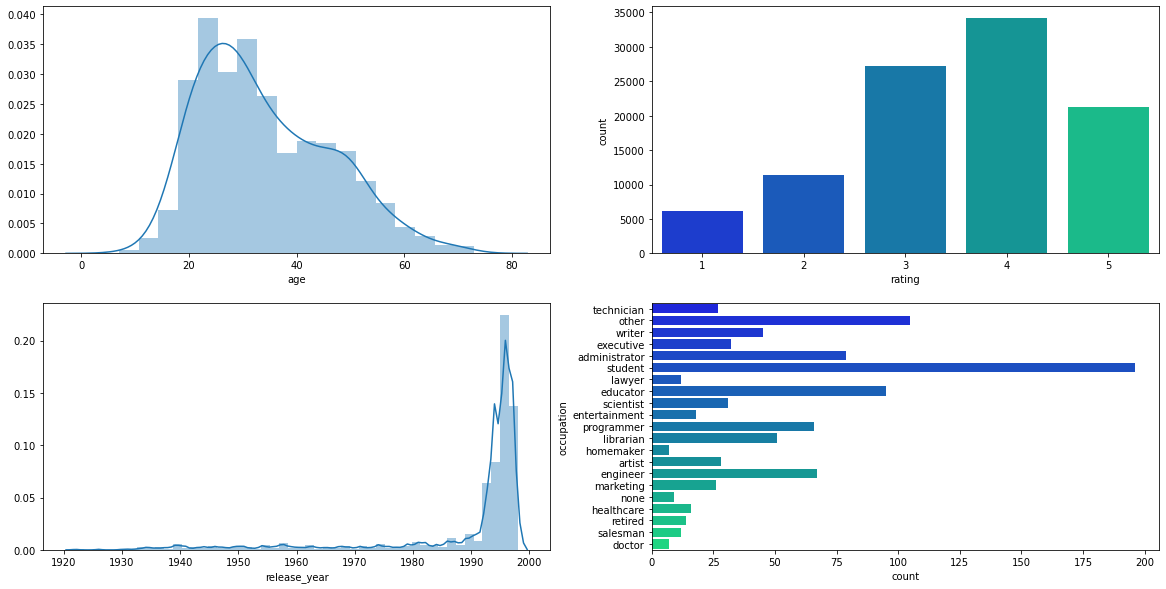

In [12]:
fig, ax =plt.subplots(2,2, figsize=(20, 10))
sns.distplot(critics.age, ax=ax[0,0])
sns.distplot(movies.release_year, ax=ax[1,0]) #used a displot as it resulted in a cleaner graphic
sns.countplot(keys.rating, ax=ax[0,1], palette='winter')
sns.countplot(y=critics.occupation, palette='winter', ax=ax[1,1]);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

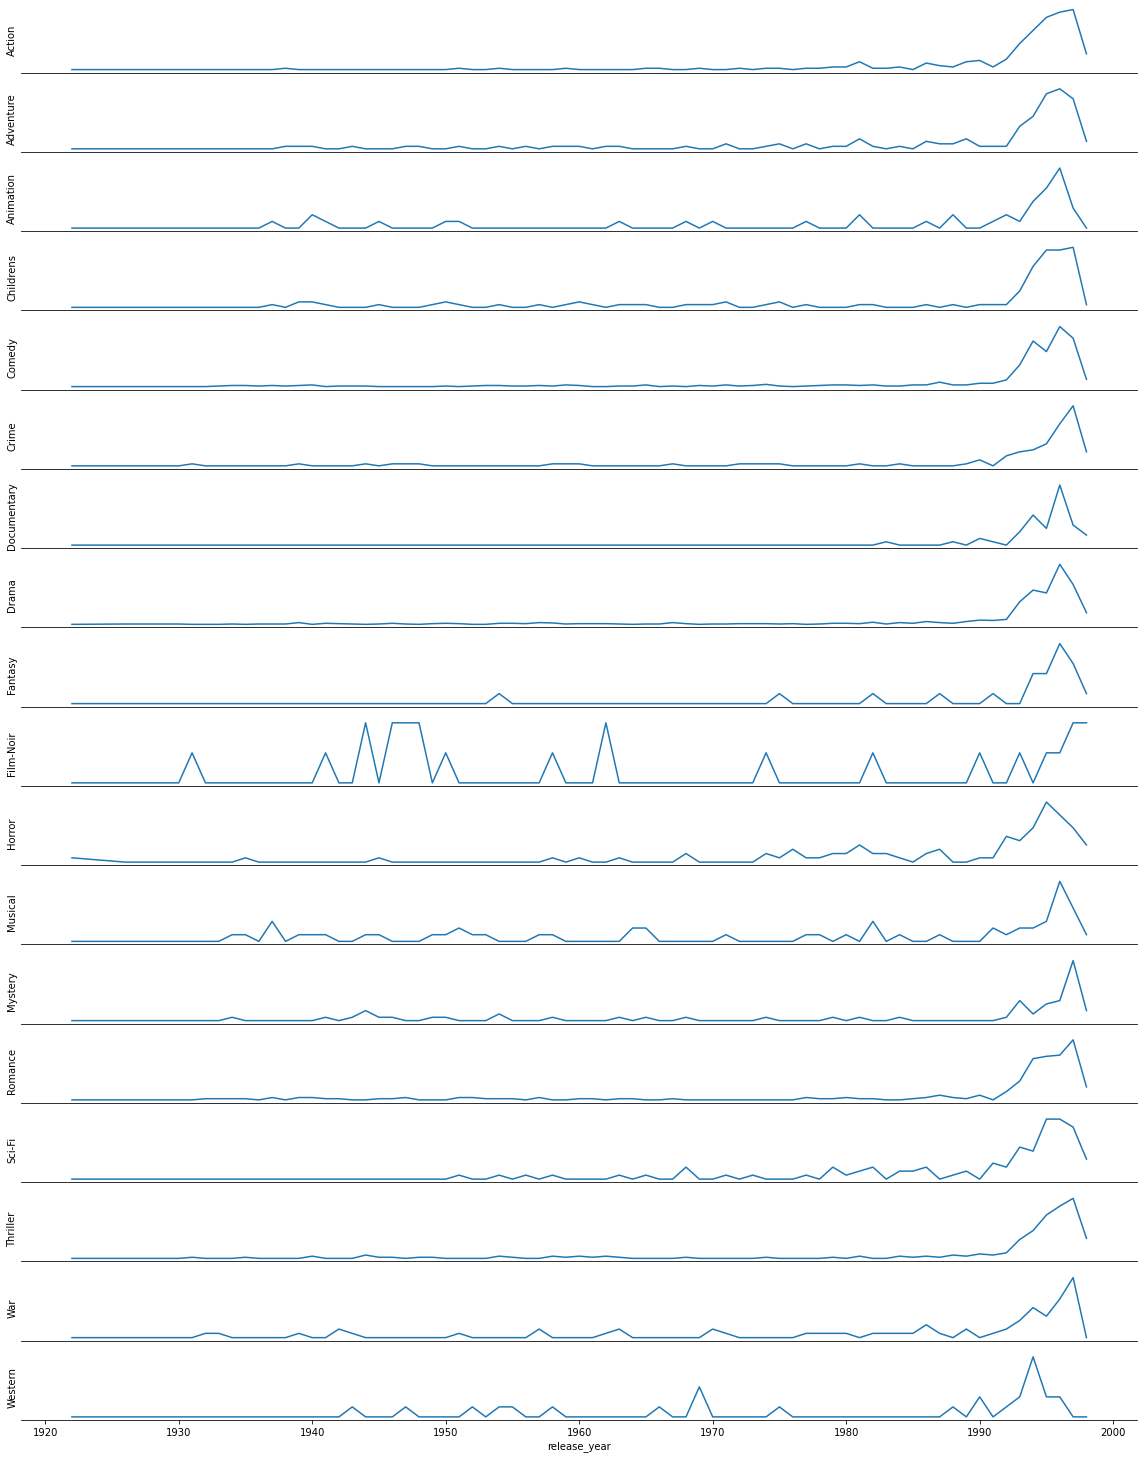

In [13]:
# Individual lineplots to show change over time better for each specific genre
cols = list(movies.groupby('release_year').sum().columns)
release_year_gb = movies.groupby('release_year').sum()
count = 0

fig, ax =plt.subplots(18,1, figsize=(20, 26))

for col in cols:
    if count != 17:
        sns.lineplot(y=release_year_gb[col], x=release_year_gb.index, estimator=None, ax=ax[count]).set_xticks([])
        ax[count].set_yticks([])
        ax[count].set_xlabel('')
        sns.despine(bottom=False, left=True)
        count+=1
    else:
        sns.lineplot(y=release_year_gb[col], x=release_year_gb.index, estimator=None, ax=ax[count]).set_yticks([])
        sns.despine(bottom=False, left=True)

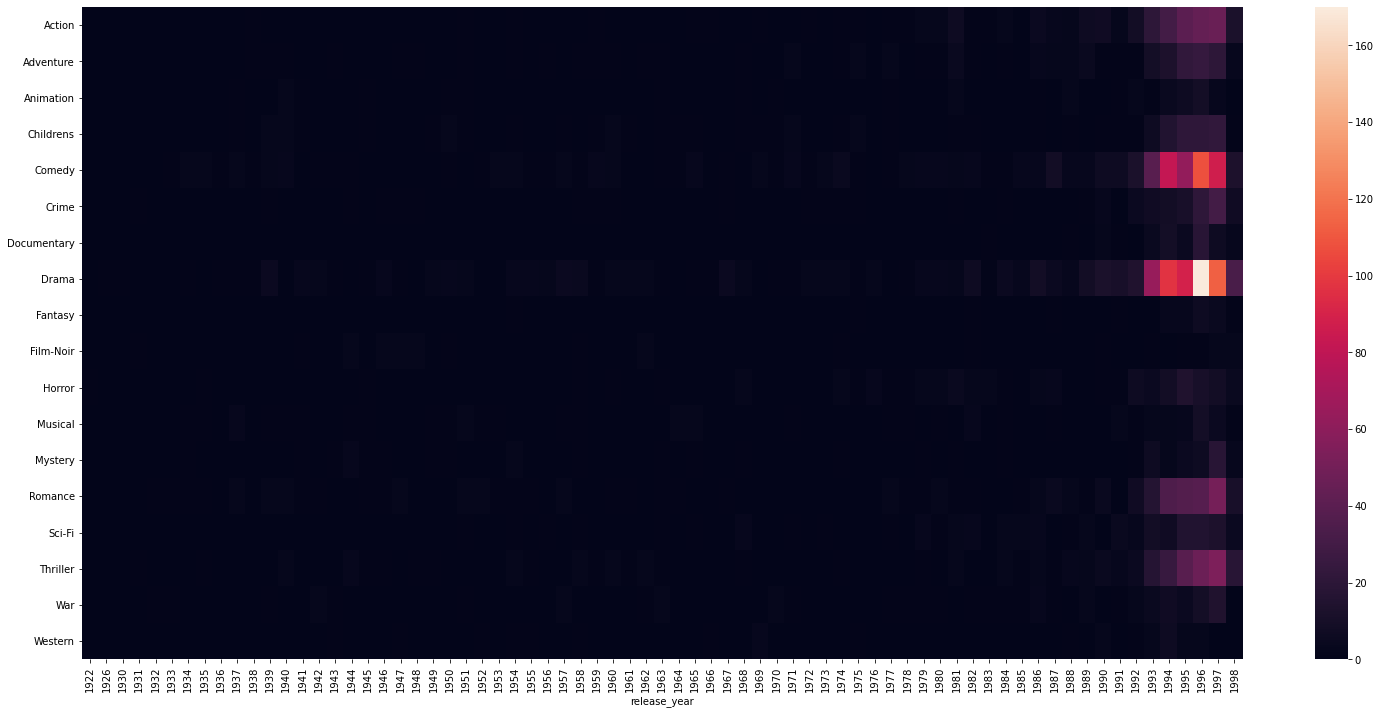

In [14]:
# A heatmap to show relative popularity between genres 
plt.figure(figsize=(26,12))
sns.heatmap(release_year_gb.transpose());

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [15]:
# First answer, not following the prescribed approach
top_25 = keys.groupby('movie id').count()
top_25 = top_25.loc[top_25['rating'] >= 100]
temp = keys.groupby('movie id').mean()
top_25.drop(['user id', 'rating'], axis=1, inplace=True)
top_25 = top_25.merge(temp.rating,left_index=True, right_index=True, how='left')
top_25 = top_25.merge(movies['movie title'], left_index=True, right_index=True, how='left')
top_25.columns = ['num_ratings', 'rating', 'movie title']
top_25.sort_values(by=['rating'], ascending=False).head(25)

,num_ratings,rating,movie title
movie id,,,
408,112,4.491071,"Close Shave, A"
318,298,4.466443,Schindler's List
169,118,4.466102,"Wrong Trousers, The"
483,243,4.456790,Casablanca
64,283,4.445230,"Shawshank Redemption, The"
603,209,4.387560,Rear Window
12,267,4.385768,"Usual Suspects, The"
50,583,4.358491,Star Wars
178,125,4.344000,12 Angry Men


In [16]:
# Following the prescribed methods
# Part 1
#top_25 = keys.groupby('movie id')
top_25 = keys.merge(movies['movie title'], left_on='movie id', right_index=True)
top_25 = top_25.groupby('movie id').count()
rated_list = list(top_25.loc[top_25['rating'] >= 100].index)

# Part 2
ratings_average = pd.DataFrame(keys.groupby('movie id').mean().sort_values(by='rating', ascending=False)['rating'])
ratings_average = ratings_average.merge(movies['movie title'], left_on='movie id', right_index=True)

# Part 3

ratings_average[ratings_average.index.isin(rated_list)].head(25)

# The commented out code was to troubleshoot the difference between the outputs in this cell and the one above
# turns out there are films with identical names so if i'm not filtering by the key value get some incorrect entries on the list
# the error has been resolved
# name_list = list(ratings_average['movie title']) 
# print('there are', len(name_list),'movies in the list with', len(name_list) - len(set(name_list)), 'identically named movies')

,rating,movie title
movie id,,
408,4.491071,"Close Shave, A"
318,4.466443,Schindler's List
169,4.466102,"Wrong Trousers, The"
483,4.456790,Casablanca
64,4.445230,"Shawshank Redemption, The"
603,4.387560,Rear Window
12,4.385768,"Usual Suspects, The"
50,4.358491,Star Wars
178,4.344000,12 Angry Men


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [17]:
#write the conclusions here
gender_df = keys.merge(critics['gender'], left_on='user id', right_index=True, how='left').merge(movies, left_on='movie id',how='left', right_index=True).drop(['user id','movie id','timestamp', 'rating', 'movie title','release date', 'release_year'], axis=1)

# Original solution, not very concise

# cols = list(gender_df.columns)
# for col in cols:
#     if col == 'gender':
#         pass
#     else:
#         display(gender_df[['gender', col]].groupby('gender').sum())

# Second solution:

gender_df = gender_df.groupby('gender').sum()
gender_df = gender_df.transpose()
gender_df['percent female'] = gender_df['F'] / (gender_df['F']+gender_df['M'])
gender_df['percent male'] = gender_df['M'] / (gender_df['F']+gender_df['M'])
#pd.options.display.precision = 2
gender_df.style.bar(subset=['percent female', 'percent male'],color='darkturquoise', vmin=-.2, vmax=1.2,axis=None)

# Initial conclusions:
# If we assume that the reviews are representative of the general viewing population we can see that men watch more movies in general than women.
# In every category men make up a larger percentage of the viewing population.
# So of each of the statements above the only one that would be false would be 'Women watch more Sci-Fi than men', as female reviews make up only 21% of that genre.

gender,F,M,percent female,percent male
Action,5442.000000,20147.000000,0.212670,0.787330
Adventure,3141.000000,10612.000000,0.228387,0.771613
Animation,995.000000,2610.000000,0.276006,0.723994
Childrens,2232.000000,4950.000000,0.310777,0.689223
Comedy,8068.000000,21764.000000,0.270448,0.729552
Crime,1794.000000,6261.000000,0.222719,0.777281
Documentary,187.000000,571.000000,0.246702,0.753298
Drama,11008.000000,28887.000000,0.275924,0.724076
Fantasy,363.000000,989.000000,0.268491,0.731509
Film-Noir,385.000000,1348.000000,0.222158,0.777842


In [18]:
# To make things more interesting let's add some assumptions:
# let's assume that men happen to be more likely to leave reviews 
# let's also assume that the reviews are representative of the non reviewing population

f_pop = int(gender_df.F.sum())
m_pop = int(gender_df.M.sum())
print('there are', f_pop,'female reviewers in this population and', m_pop, 'male reviewers,\nthat means there are about three times as many male reviews as female.')

there are 53701 female reviewers in this population and 158884 male reviewers,
that means there are about three times as many male reviews as female.


In [19]:
# Commented out code is for evaluation purposes, testing to make sure that we didn't loose too much information by rounding

# test_f, test_m = [], []
for col in cols:
    temp_f, temp_m = round((gender_df.loc[col][0])/f_pop, 2), round((gender_df.loc[col][1])/m_pop, 2)
#     test_f += [temp_f]
#     test_m += [temp_m]
    print(str(temp_f)+'%', 'of female movie viewing time is spent on', col+'s')
    print(str(temp_m)+'%', 'of male movie viewing time is spent on', col+'s')
    print('')
# print(sum(test_f), sum(test_m))

0.1% of female movie viewing time is spent on Actions
0.13% of male movie viewing time is spent on Actions

0.06% of female movie viewing time is spent on Adventures
0.07% of male movie viewing time is spent on Adventures

0.02% of female movie viewing time is spent on Animations
0.02% of male movie viewing time is spent on Animations

0.04% of female movie viewing time is spent on Childrenss
0.03% of male movie viewing time is spent on Childrenss

0.15% of female movie viewing time is spent on Comedys
0.14% of male movie viewing time is spent on Comedys

0.03% of female movie viewing time is spent on Crimes
0.04% of male movie viewing time is spent on Crimes

0.0% of female movie viewing time is spent on Documentarys
0.0% of male movie viewing time is spent on Documentarys

0.2% of female movie viewing time is spent on Dramas
0.18% of male movie viewing time is spent on Dramas

0.01% of female movie viewing time is spent on Fantasys
0.01% of male movie viewing time is spent on Fantasy

In [20]:
 # Conclusions:
# This second way of viewing the data supports the statement that more men watch drama than women.
# It would appear that more men watch scifi than women, however the difference here is much more narrow so there would be a lower confidence on this statement.
# This second way of viewing the data would suggest that women watch more romance than men (note that this is the only statement in the list that conflicts with the initial findings).